In [7]:
pip install pandas geopy openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [15]:
from geopy.geocoders import Nominatim
import pandas as pd, time

df = pd.read_excel("/Users/majdshamashan/Downloads/Philippine dataset.xlsx")

geolocator = Nominatim(user_agent="ph-mapper")   # ← choose any user-agent
def lat_lon(place):
    """Returns (lat, lon) or (None, None) if not found."""
    try:
        loc = geolocator.geocode(f"{place}, Philippines", timeout=10)
        if loc: 
            return loc.latitude, loc.longitude
    except Exception as e:
        print("Error:", e)
    return None, None

lats, lons = [], []
for mun in df["Municipality"]:
    lat, lon = lat_lon(mun)
    lats.append(lat); lons.append(lon)
    time.sleep(1)             # play nicely with the free API (≤ 1 req/s)

df["Lat"], df["Lon"] = lats, lons



In [23]:
df.to_excel("/Users/majdshamashan/Downloads/Philippine dataset.xlsx")

In [25]:
df

,Region,Municipality,Total Population,Household Population,Number of Households,Lat,Lon
0,NATIONAL CAPITAL REGION,Manila,1846513,1837785,486293,14.590449,120.980362
1,NATIONAL CAPITAL REGION,Mandaluyong,425758,419333,116954,14.577439,121.033897
2,NATIONAL CAPITAL REGION,Marikina,456059,452961,104415,14.633108,121.099354
3,NATIONAL CAPITAL REGION,Pasig,803159,801439,212895,14.560517,121.076434
4,NATIONAL CAPITAL REGION,Quezon City,2960048,2950493,738724,14.651055,121.048625
...,...,...,...,...,...,...,...
111,BANGSAMORO AUTONOMOUS,Basilan,426207,425111,73419,6.564982,122.064918
112,BANGSAMORO AUTONOMOUS,Lanao del Sur,1195518,1194507,183629,7.877644,124.375476
113,BANGSAMORO AUTONOMOUS,Maguindanao,1667258,1666353,287284,6.101486,125.159774
114,BANGSAMORO AUTONOMOUS,Sulu,1000108,998675,166140,5.994281,121.078793


In [ ]:
pd.read_excel('/Users/majdshamashan/Downloads/Philippine dataset.xlsx')

In [63]:
# ------------------------------------------------------------
# 0.  One-time installs (skip if already present)
# ------------------------------------------------------------
# !pip install folium bra

# ------------------------------------------------------------
# 2.  Make a colour scale tied to the population range
# ------------------------------------------------------------
pop_min, pop_max = df["Total Population 2020"].min(), df["Total Population 2020"].max()
cmap = LinearColormap(
        colors=["#ffffb2", "#fecc5c", "#fd8d3c", "#e34a33", "#b30000"],
        vmin=pop_min,
        vmax=pop_max,
    ).to_step(n=5)      # five bands → clear legend steps
cmap.caption = "Total population 2020"

# ------------------------------------------------------------
# 3.  Build the interactive Folium map
# ------------------------------------------------------------
m = folium.Map(
        location=[12.8797, 121.7740],   # geographic centre of PH
        zoom_start=5,
        tiles="cartodbpositron"
    )

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Lat"], row["Lon"]],
        radius=5,                                    # symbol size
        color=cmap(row["Total Population 2020"]),         # outline
        fill=True,
        fill_color=cmap(row["Total Population 2020"]),
        fill_opacity=0.8,
        tooltip=folium.Tooltip(
            f"<b>{row['Municipality/City']}</b><br>"
            f"Population {row['Total Population 2020']:,}"
        ),
    ).add_to(m)

# add the legend
cmap.add_to(m)

# ------------------------------------------------------------
# 4.  Save → open in any browser
# ------------------------------------------------------------
m.save("philippine_municipalities_population_2020.html")
print("MAP READY → philippine_municipalities_population_2020.html")


MAP READY → philippine_municipalities_population_2020.html


In [29]:
!pip install folium branca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 5.2 MB/s eta 0:00:00


In [65]:
from IPython.display import IFrame
IFrame("philippine_municipalities_population.html", width=850, height=600)

In [5]:
import os
print(os.getcwd())

/Users/majdshamashan


In [51]:
df = pd.read_excel('/Users/majdshamashan/Downloads/Philippine dataset.xlsx')
df

,Region,Municipality/City,Total Population 2020,Total Population 2015,Household Population,Number of Households,Lat,Lon
0,NATIONAL CAPITAL REGION,Manila,1846513.0,1780148.0,1837785.0,486293.0,14.590449,120.980362
1,NATIONAL CAPITAL REGION,Mandaluyong,425758.0,386276.0,419333.0,116954.0,14.577439,121.033897
2,NATIONAL CAPITAL REGION,Marikina,456059.0,450741.0,452961.0,104415.0,14.633108,121.099354
3,NATIONAL CAPITAL REGION,Pasig,803159.0,755300.0,801439.0,212895.0,14.560517,121.076434
4,NATIONAL CAPITAL REGION,Quezon,2960048.0,2936116.0,2950493.0,738724.0,14.651055,121.048625
...,...,...,...,...,...,...,...,...
111,BANGSAMORO AUTONOMOUS,Lanao del Sur,1195518.0,1045429.0,1194507.0,183629.0,7.877644,124.375476
112,BANGSAMORO AUTONOMOUS,Maguindanao,1667258.0,1173933.0,1666353.0,287284.0,6.101486,125.159774
113,BANGSAMORO AUTONOMOUS,Sulu,1000108.0,824731.0,998675.0,166140.0,5.994281,121.078793
114,BANGSAMORO AUTONOMOUS,Tawi-Tawi,440276.0,390715.0,438545.0,74768.0,5.205700,120.026500


In [67]:
pop_min, pop_max = df["Total Population 2015"].min(), df["Total Population 2015"].max()
cmap = LinearColormap(
        colors=["#ffffb2", "#fecc5c", "#fd8d3c", "#e34a33", "#b30000"],
        vmin=pop_min,
        vmax=pop_max,
    ).to_step(n=5)      # five bands → clear legend steps
cmap.caption = "Total population 2015"

# ------------------------------------------------------------
# 3.  Build the interactive Folium map
# ------------------------------------------------------------
m = folium.Map(
        location=[12.8797, 121.7740],   # geographic centre of PH
        zoom_start=5,
        tiles="cartodbpositron"
    )

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Lat"], row["Lon"]],
        radius=5,                                    # symbol size
        color=cmap(row["Total Population 2015"]),         # outline
        fill=True,
        fill_color=cmap(row["Total Population 2015"]),
        fill_opacity=0.8,
        tooltip=folium.Tooltip(
            f"<b>{row['Municipality/City']}</b><br>"
            f"Population {row['Total Population 2015']:,}"
        ),
    ).add_to(m)

# add the legend
cmap.add_to(m)

# ------------------------------------------------------------
# 4.  Save → open in any browser
# ------------------------------------------------------------
m.save("philippine_municipalities_population_2015.html")
print("MAP READY → philippine_municipalities_population_2015.html")

MAP READY → philippine_municipalities_population_2015.html


In [69]:
from IPython.display import IFrame
IFrame("philippine_municipalities_population_2015.html", width=850, height=600)

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns



In [93]:
df.loc[df['Municipality/City']=='Isabela', 'Total Population 2015'] = 112788

In [95]:
df = df.drop('population_growth_rate', axis=1)

In [103]:
df.loc[df['Municipality/City']=='Isabela', 'population_growth_rate']

30    1404.637018
85      15.596517
Name: population_growth_rate, dtype: float64

In [105]:
df = pd.read_excel('/Users/majdshamashan/Downloads/Philippine dataset.xlsx')
df

,Region,Municipality/City,Total Population 2020,Total Population 2015,Household Population,Number of Households,Lat,Lon
0,NATIONAL CAPITAL REGION,Manila,1846513,1780148,1837785,486293,14.590449,120.980362
1,NATIONAL CAPITAL REGION,Mandaluyong,425758,386276,419333,116954,14.577439,121.033897
2,NATIONAL CAPITAL REGION,Marikina,456059,450741,452961,104415,14.633108,121.099354
3,NATIONAL CAPITAL REGION,Pasig,803159,755300,801439,212895,14.560517,121.076434
4,NATIONAL CAPITAL REGION,Quezon,2960048,2936116,2950493,738724,14.651055,121.048625
...,...,...,...,...,...,...,...,...
110,BANGSAMORO AUTONOMOUS,Basilan,426207,346579,425111,73419,6.564982,122.064918
111,BANGSAMORO AUTONOMOUS,Lanao del Sur,1195518,1045429,1194507,183629,7.877644,124.375476
112,BANGSAMORO AUTONOMOUS,Maguindanao,1667258,1173933,1666353,287284,6.101486,125.159774
113,BANGSAMORO AUTONOMOUS,Sulu,1000108,824731,998675,166140,5.994281,121.078793


In [107]:
df['population_growth_rate'] = ((df['Total Population 2020'] - df['Total Population 2015']) / df['Total Population 2015']) * 100
df.head()

,Region,Municipality/City,Total Population 2020,Total Population 2015,Household Population,Number of Households,Lat,Lon,population_growth_rate
0,NATIONAL CAPITAL REGION,Manila,1846513,1780148,1837785,486293,14.590449,120.980362,3.728061
1,NATIONAL CAPITAL REGION,Mandaluyong,425758,386276,419333,116954,14.577439,121.033897,10.221189
2,NATIONAL CAPITAL REGION,Marikina,456059,450741,452961,104415,14.633108,121.099354,1.179835
3,NATIONAL CAPITAL REGION,Pasig,803159,755300,801439,212895,14.560517,121.076434,6.336423
4,NATIONAL CAPITAL REGION,Quezon,2960048,2936116,2950493,738724,14.651055,121.048625,0.815090


In [109]:
df['population_growth_rate'].describe()

count    115.000000
mean       7.324594
std        5.926488
min       -7.578346
25%        3.842611
50%        6.078190
75%        9.963853
max       42.023267
Name: population_growth_rate, dtype: float64

In [121]:
df_city = df.set_index(df["Municipality/City"])

# 3. Compute correlation between cities
# This assumes each column is a numeric variable (e.g. population, growth rate, density)
similarity_matrix = df['Municipality/City'].T.corr()  # shape: (cities x cities)

# 4. Plot
plt.figure(figsize=(14, 12))
sns.heatmap(
    similarity_matrix,
    cmap="coolwarm",         # or use "vlag", "RdBu_r", etc.
    center=0,                # centers color scale at 0 for correlation
    square=True,
    xticklabels=True,
    yticklabels=True,
    linewidths=0.2,
    cbar_kws={"label": "Correlation"}
)
plt.title("Similarity Between Cities Based on Population Features")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

TypeError: Series.corr() missing 1 required positional argument: 'other'

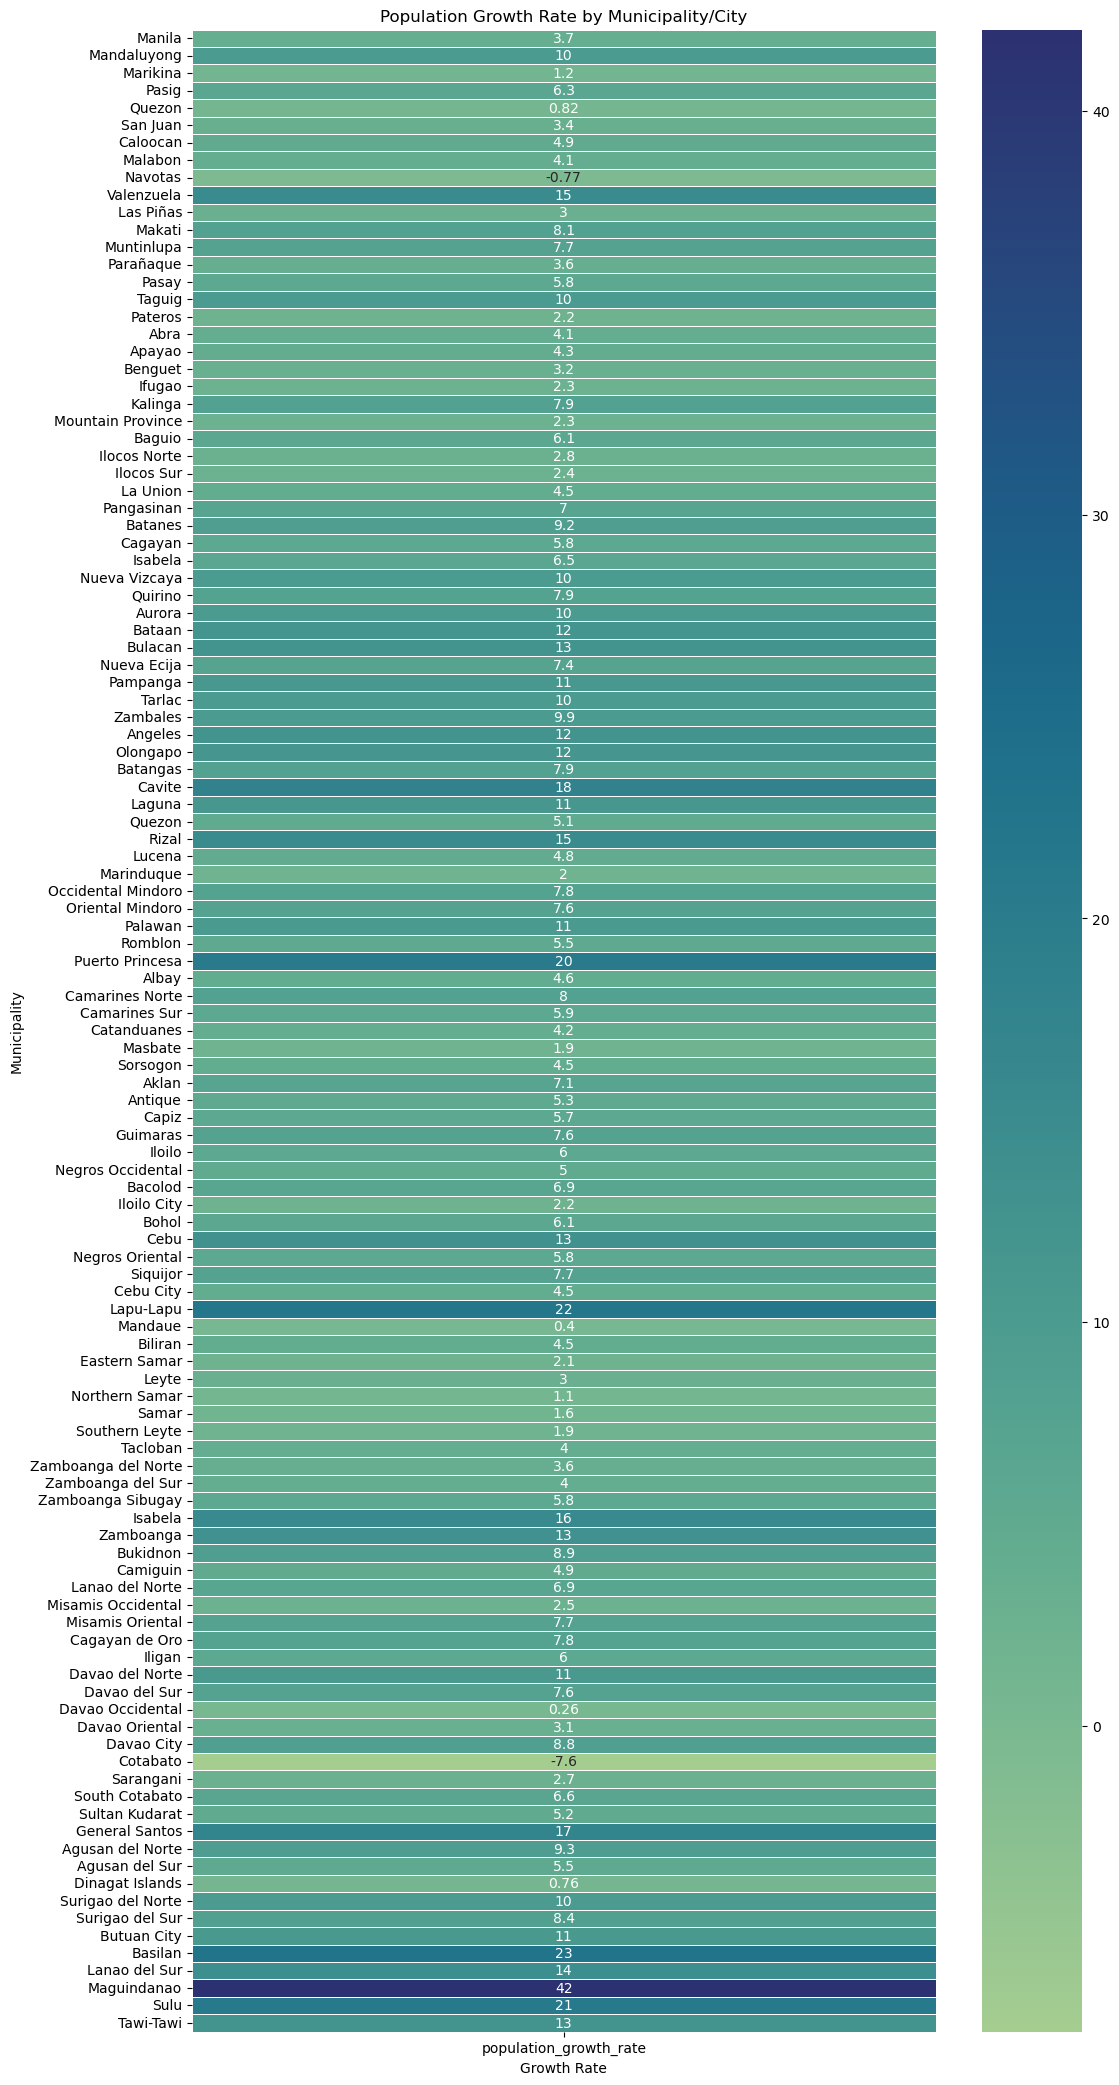

In [165]:
plt.figure(figsize=(12, 26))  # taller layout to fit many rows
sns.heatmap(
    df.set_index("Municipality/City")[["population_growth_rate"]],
    annot=True,
    cmap="crest",
    linewidths=0.6
)
plt.title("Population Growth Rate by Municipality/City")
plt.xlabel("Growth Rate")
plt.ylabel("Municipality")
plt.show()


In [167]:
pop_min, pop_max = df["population_growth_rate"].min(), df["population_growth_rate"].max()
cmap = LinearColormap(
         colors = [
    "#ccece6",  # soft aqua (darker than #e0f3f8)
    "#99d8c9",  # muted teal
    "#66c2a4",  # green-turquoise
    "#41b6c4",  # vibrant teal-blue
    "#2c7fb8",  # medium blue
    "#1d4f8a",  # dark blue
    "#0b1a39"   # deep navy
],
    vmin=pop_min,
    vmax=pop_max
).to_step(n=7)      # five bands → clear legend steps
cmap.caption = "Philippine municipalities/cities population grwoth rate 2015_2020 (%)"

# ------------------------------------------------------------
# 3.  Build the interactive Folium map
# ------------------------------------------------------------
m = folium.Map(
        location=[12.8797, 121.7740],   # geographic centre of PH
        zoom_start=5,
        tiles="cartodbpositron"
    )

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Lat"], row["Lon"]],
        radius=5,                                    # symbol size
        color=cmap(row["population_growth_rate"]),         # outline
        fill=True,
        fill_color=cmap(row["population_growth_rate"]),
        fill_opacity=0.8,
        tooltip=folium.Tooltip(
            f"<b>{row['Municipality/City']}</b><br>"
            f"Population {row['population_growth_rate']:,}"
        ),
    ).add_to(m)

# add the legend
cmap.add_to(m)

# ------------------------------------------------------------
# 4.  Save → open in any browser
# ------------------------------------------------------------
m.save("philippine_population_2015_2020.html")
print("MAP READY → philippine_municipalities/cities_population_grwoth_rate_2015_2020.html")

MAP READY → philippine_municipalities/cities_population_grwoth_rate_2015_2020.html


In [161]:
from IPython.display import IFrame
IFrame("philippine_population_2015_2020.html", width=850, height=600)

In [171]:
df.to_excel('/Users/majdshamashan/Desktop/Thesis/Philippinne_dataset.xlsx', index=False)